# Study orbital decay of short-period planets

## Import ploonetide and other libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ploonetide import TidalSimulation
from ploonetide.utils.functions import mean2axis
from ploonetide.utils.constants import GYEAR, KYEAR, DAY, MSUN, AU

## Create TidalSimulation object for star-planet system

In [2]:
simulation = TidalSimulation(
    system='star-planet',
    star_mass=0.8,  # Solar masses
    star_radius=1.0,  # Solar radii 
    star_rotperiod=10,  # days
    star_internal_evolution=False,
    planet_mass=2,  # Jupiter masses 
    planet_radius=1.3,  # Jupiter radii
    planet_orbperiod=2,  # days
    planet_rotperiod=2,  # days (here tidal-locking)
    planet_eccentricity=0.02,
    planet_size_evolution=False,
    planet_internal_evolution=True,
    planet_core_dissipation=False,
)

       _                        _   _     _      
 _ __ | | ___   ___  _ __   ___| |_(_) __| | ___ 
| '_ \| |/ _ \ / _ \| '_ \ / _ \ __| |/ _` |/ _ \
| |_) | | (_) | (_) | | | |  __/ |_| | (_| |  __/
| .__/|_|\___/ \___/|_| |_|\___|\__|_|\__,_|\___|
|_|                                              


Star mass: 0.8 solMass
 Star radius: 1.0 solRad
 Star rotation period: 10.0 d
 Planet orbital period: 2.0 d
 Planet mass: 2.0 jupiterMass
 Planet radius: 1.3 jupiterRad
 Planet eccentricity: 0.0200



----
## After building the TidalSimulation class instance, and before running the simulation, you still can modify any parameter in `dir(simulation)`:

In [3]:
# print(dir(simulation))  # Uncomment this line to print all the simulation attributes
simulation.star_mass = 1.0  # Solar masses
simulation.planet_mass = 1.0  # Jupiter masses

In [4]:
# Now let's print the list of all the parameters
# to be used (everything is in SI units)
simulation.parameters

{'Ms': 1.988409870698051e+30,
 'Rs': 695700000.0,
 'Ls': 6.463570700718025e+25,
 'coeff_star': 0.5,
 'star_alpha': 0.25,
 'star_beta': 0.25,
 'os_saturation': 4.3421e-05,
 'star_age': 1.57788e+17,
 'coeff_planet': 0.26401,
 'Mp': 1.8981245973360505e+27,
 'Rp': 92939600.0,
 'planet_alpha': 0.126,
 'planet_beta': 0.02,
 'rigidity': 44600000000.0,
 'E_act': 300000.0,
 'B': 25.0,
 'Ts': 1600.0,
 'Tb': 1800.0,
 'Tl': 2000.0,
 'Cp': 1260.0,
 'ktherm': 2.0,
 'Rac': 1100.0,
 'a2': 1.0,
 'alpha_exp': 0.0001,
 'densm': 5495.021865555213,
 'Mm': 5.972167867791379e+24,
 'Rm': 6378100.0,
 'melt_fr': 0.5,
 'sun_mass_loss_rate': 882124692.301465,
 'sun_omega': 2.67e-06,
 'os_ini': 7.272205216643039e-06,
 'np_ini': 3.636102608321527e-05,
 'op_ini': 3.63610260832152e-05,
 'ep_ini': 0.02,
 'mp_ini': 1.8981245973360505e+27,
 'nm_ini': 1.9628360796108954e-05,
 'Tm_ini': 925.7561647770565,
 'Em_ini': 395460841311.21844,
 'em_ini': 0.02,
 'args': {'star_internal_evolution': False,
  'star_k2q': 2.4805107270

### Choose the total integration time and time-step

In [5]:
integration_time = 1 * simulation.star_lifespan.to('s').value
timestep = 50 * KYEAR

### Choose the integrator and run the simulation

In [6]:
simulation.set_integration_method('lsoda')
simulation.run(integration_time, timestep)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1519885935121D+17   r2 =  0.9781002137473D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1519885935121D+17   r2 =  0.9781002137473D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1519885935121D+17   r2 =  0.7472138639798D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1519885935121D+17   r2 =  0.7472138639798D+00
 lsoda--  warning..internal t (=r1) 

### Get the times and solutions

In [7]:
times, solutions = simulation.history    
nps = solutions[:, 0]
oms = solutions[:, 1]
eps = solutions[:, 2]
osms = solutions[:, 3]
mps = solutions[:, 4]
aps = mean2axis(nps, simulation.star_mass.to('kg').value, mps)

/Users/Jaime/Documents/MacquarieUni/PhD/software_packages/ploonetide/src/ploonetide/utils/functions.py:255: RuntimeWarning: divide by zero encountered in true_divide
  return (GCONST * (M + m) / N**2.0)**(1.0 / 3.0)


### Plot the solutions using matplotlib and a few helper functions from ploonetide 

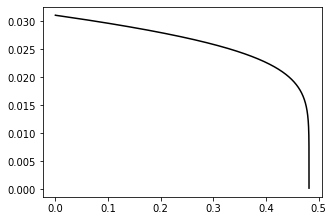

In [8]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(times / GYEAR, aps / AU, 'k-')
fig.savefig("migration_star-planet.png", dpi=300, facecolor='w')